# Imports

In [1]:
import pandas as pd 
import numpy as np

# Topics

## Preparing the dataframe

In [2]:
# Create a sample DataFrame for demonstration
data = {
    'ID': range(1, 101),  # IDs for 100 individuals
    'Age': np.random.randint(15, 65, 100),  # Random ages between 15 and 65
    'Grade': np.random.choice(['Freshman', 'Sophomore', 'Junior', 'Senior'], 100)  # Random school grades
}
df = pd.DataFrame(data)

df.head()

,ID,Age,Grade
0,1,45,Junior
1,2,53,Freshman
2,3,49,Sophomore
3,4,17,Junior
4,5,36,Junior


## Simple Random Sampling

In [3]:
# 1. Simple Random Sampling 
srs_sample = df.sample(n=10)  # Get 10 random rows from the DataFrame

print("Simple Random Sampling (SRS) Sample:")
srs_sample

Simple Random Sampling (SRS) Sample:


,ID,Age,Grade
48,49,43,Junior
92,93,17,Junior
84,85,22,Sophomore
31,32,47,Sophomore
51,52,28,Sophomore
49,50,54,Junior
73,74,58,Senior
26,27,26,Senior
72,73,51,Sophomore
69,70,27,Freshman


## Stratified Random Sampling

In [4]:
# 2. Stratified Sampling
strat_sample = df.groupby('Grade').apply(lambda x: x.sample(n=2) , include_groups=False).reset_index().drop('level_1',axis=1)
strat_sample

,Grade,ID,Age
0,Freshman,94,15
1,Freshman,60,60
2,Junior,78,19
3,Junior,34,21
4,Senior,80,45
5,Senior,45,52
6,Sophomore,75,26
7,Sophomore,69,58


# Cluster Sampling

In [5]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [6]:
clusters = df.groupby(df.index // 10)  # Create 10 clusters
selected_clusters = clusters.apply(lambda x: x if np.random.rand() < 0.2 else None).dropna()  # Select 20% of clusters

print("\nCluster Sampling Sample:")
selected_clusters


Cluster Sampling Sample:


ID  Age      Grade
5 50   51   34   Freshman
  51   52   28  Sophomore
  52   53   21  Sophomore
  53   54   40     Junior
  54   55   17     Senior
  55   56   27     Senior
  56   57   64     Junior
  57   58   25  Sophomore
  58   59   39   Freshman
  59   60   60   Freshman
9 90   91   61     Junior
  91   92   60     Junior
  92   93   17     Junior
  93   94   15   Freshman
  94   95   37  Sophomore
  95   96   49  Sophomore
  96   97   36     Senior
  97   98   25     Senior
  98   99   16  Sophomore
  99  100   58  Sophomore

## Systematic Sampling

In [7]:
k = len(df) // 10
systematic_sample = df.iloc[::k]  # Get every 10th row from the DataFrame
print("\nSystematic Sampling Sample:")

systematic_sample


Systematic Sampling Sample:


,ID,Age,Grade
0,1,45,Junior
10,11,45,Sophomore
20,21,39,Freshman
30,31,36,Sophomore
40,41,24,Junior
50,51,34,Freshman
60,61,37,Sophomore
70,71,29,Senior
80,81,30,Freshman
90,91,61,Junior


In [8]:
# 5. Convenience Sampling
# Here, we'll just take the first 10 rows. In real-world scenarios, this would be akin to surveying whoever comes first.
conv_sample = df.head(10)

print("\nConvenience Sampling Sample:")
conv_sample


Convenience Sampling Sample:


,ID,Age,Grade
0,1,45,Junior
1,2,53,Freshman
2,3,49,Sophomore
3,4,17,Junior
4,5,36,Junior
5,6,37,Freshman
6,7,25,Senior
7,8,30,Senior
8,9,60,Freshman
9,10,54,Freshman


In [9]:
# Let's say we have a quota to sample 3 individuals from each grade.
quota_sample = df.groupby('Grade').apply(lambda x: x.sample(n=3) , include_groups=False).reset_index().drop('level_1',axis=1)

print("\nQuota Sampling Sample:")
quota_sample # selection of samples from equal groups may not be random 


Quota Sampling Sample:


,Grade,ID,Age
0,Freshman,94,15
1,Freshman,51,34
2,Freshman,77,42
3,Junior,20,60
4,Junior,50,54
5,Junior,76,40
6,Senior,45,52
7,Senior,66,32
8,Senior,64,37
9,Sophomore,18,21


In [10]:
%matplotlib inline

In [11]:
# CLT 
import numpy as np
import matplotlib.pyplot as plt


# Generating the population data
np.random.seed(0)
population_data = np.random.randn(10000) * 15 + 75  # Let's say the population data is normally distributed with mean 75 and standard deviation 15.

# Simulate the sampling distribution of the sample mean
num_samples = 1000
sample_size = 100
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(population_data, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))




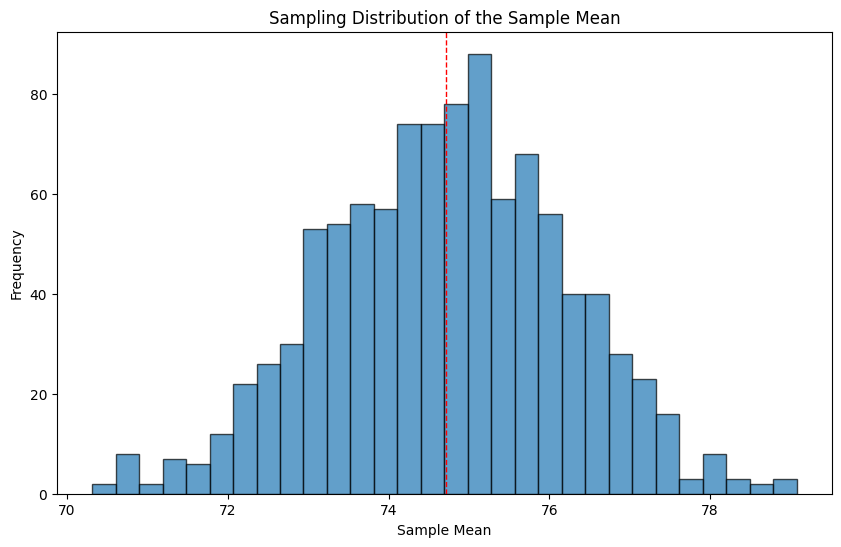

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.title("Sampling Distribution of the Sample Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.axvline(x=np.mean(sample_means), color='r', linestyle='dashed', linewidth=1)
plt.show()